# Topic 38: Time Series Models

https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

* AR model (autoregression)
* MA model (moving average)
* ARMA model (autoregression + moving average)
* Differencing model
* ARIMA model (autoregression + differencing + moving average)
* SARIMA model (seasonal ARIMA)
* ARIMAX model (ARIMA + exogenous variables)
* SARIMAX model (seasonal ARIMA + exogenous variables)

## Auto-regressive Time Series Model

An autoregression model makes an assumption that the observations at previous time steps are useful to predict the value at the next time step. It is one of the simplest time series models in which we use a linear model to predict the value at the present time using the value at the previous time. 

<p style='text-align:center; font-size: 30px;'>𝑌<sub>t</sub>=𝜙<sub>1</sub>𝑌<sub>𝑡−1</sub>+𝜖<sub>𝑡</sub></p>

The numeral one (1) denotes that the next instance is solely dependent on the previous instance.  The 𝜙(phi) is a coefficient which we seek so as to minimize the error function.

The order of AR is the number of lag terms we are using to predict the present value (AR(1) uses only 1 lag - one value directly preceding the value you are trying to predict, AR(2) use the two values directly preceding the value you are trying to predict) 

#### How do we determine the order aka how many lag terms do we include? 

Using ACF and PACF! 

<img src='resources/AR(1).png'>

### AR(1) Model

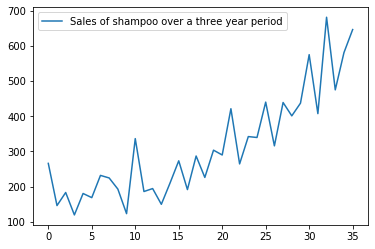

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA

#read in csv
shampoo = pd.read_csv('resources/shampoo.csv', header=0, usecols=[1]).iloc[:-1]
#plot of data to see visualize trends
shampoo.plot()

In [196]:
# train-test-split for time series isn't random!
train, test = shampoo.iloc[:24], shampoo.iloc[24:]

In [98]:
# order = (p, d, q)
# p - autoregressive
# d - differences
# q - moving average

ar1 = ARIMA(train, order=(1,0,0)).fit()
trainpreds = ar1.predict()
testpreds = ar1.forecast(12)

In [99]:
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   24
Model:                                        ARIMA(1, 0, 0)   Log Likelihood                -136.476
Date:                                       Wed, 13 Jan 2021   AIC                            278.951
Time:                                               10:41:19   BIC                            282.485
Sample:                                                    0   HQIC                           279.889
                                                        - 24                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.6186     22.236     10.416      0.000     188.037     275.200
ar.L1          0.2477      0.236      1.050      0.294      -0.215       0.710
sigma2      5076.8668   1780.772      2.851      0.004    1586.617    8567.117
===================================================================================
Ljung-Box (Q):                       35.92   Jarque-Bera (JB):                 1.84
Prob(Q):                              0.04   Prob(JB):                         0.40
Heteroskedasticity (H):               2.30   Skew:                             0.68
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

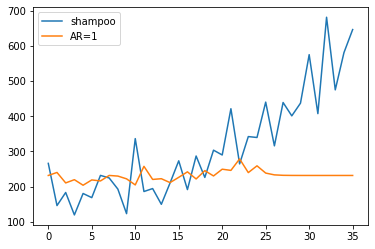

In [100]:
plt.plot(shampoo, label='shampoo')
plt.plot(trainpreds.append(testpreds), label='AR=1')
plt.legend()
plt.show()

In [101]:
print('Train RMSE: ', mean_squared_error(train, trainpreds)**0.5)
print('RMSE: ', mean_squared_error(test, testpreds)**0.5)

Train RMSE:  71.2734314079679
RMSE:  269.93174532236065


### AR(2) Model

In [90]:
ar2 = ARIMA(train, order=(2,0,0)).fit()
ar2preds = model.predict()
ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                           SARIMAX Results                                           
=====================================================================================================
Dep. Variable:     Sales of shampoo over a three year period   No. Observations:                   24
Model:                                        ARIMA(2, 0, 0)   Log Likelihood                -133.635
Date:                                       Wed, 13 Jan 2021   AIC                            275.270
Time:                                               10:39:21   BIC                            279.983
Sample:                                                    0   HQIC                           276.521
                                                        - 24                                         
Covariance Type:                                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        235.3113     33.108      7.107      0.000     170.421     300.201
ar.L1          0.1235      0.221      0.560      0.575      -0.309       0.556
ar.L2          0.4800      0.246      1.948      0.051      -0.003       0.963
sigma2      3931.8476   1215.749      3.234      0.001    1549.023    6314.672
===================================================================================
Ljung-Box (Q):                       18.23   Jarque-Bera (JB):                 1.17
Prob(Q):                              0.74   Prob(JB):                         0.56
Heteroskedasticity (H):               1.72   Skew:                             0.54
Prob(H) (two-sided):                  0.46   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

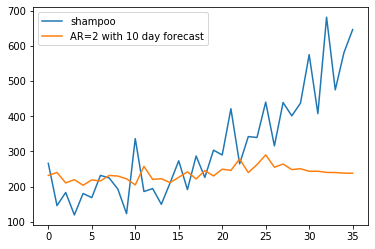

In [102]:
plt.plot(shampoo, label='shampoo')
plt.plot(ar2preds.append(ar2.forecast(12)), label='AR=2 with 10 day forecast')
plt.legend()
plt.show()

In [103]:
print('Train RMSE: ', mean_squared_error(train, ar2.predict())**0.5)
print('Test RMSE: ', mean_squared_error(test, ar2.forecast(12))**0.5)

Train RMSE:  63.41670787216358
Test RMSE:  257.1922062895154


## Moving Average Time Series Model

Sometimes, a past value is not a useful indicator of what value will come next. Consider a system that is subject to a lot of shocks/volatility. If a previous time period experiences a shock it may cause an error for future predictions if we just that value. A moving average model helps address this behavior. 

A moving average term in a time series model is a past error (multiplied by a coefficient).

An MA model assumes present value is related to errors in the past - includes memory of past errors


<p style='text-align: center; font-size:30px;'>𝑌<sub>t</sub>=μ + 𝜖<sub>𝑡</sub>+𝜃<sub>1</sub>𝜖<sub>𝑡−1</sub></p>

For more details on how this model is fit: https://stats.stackexchange.com/questions/26024/moving-average-model-error-terms/74826#74826 

## Differencing Model aka Integrated Model

The differenced value is equal to the present value minus the value at the next lag. A time series which needs to be differenced to be made stationary is said to be an "integrated" time series.

<p>If d=0:  y<sub>t</sub>  =  Y<sub>t</sub></p>

If d=1:  y<sub>t</sub> =  Y<sub>t</sub> - Y<sub>t-1</sub>

If d=2:  y<sub>t</sub> =  (Y<sub>t</sub> - Y<sub>t-1</sub>) - (Y<sub>t-1</sub> - Y<sub>t-2</sub>)  =  Y<sub>t</sub> - 2Y<sub>t-1</sub> + Y<sub>t-2</sub>

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


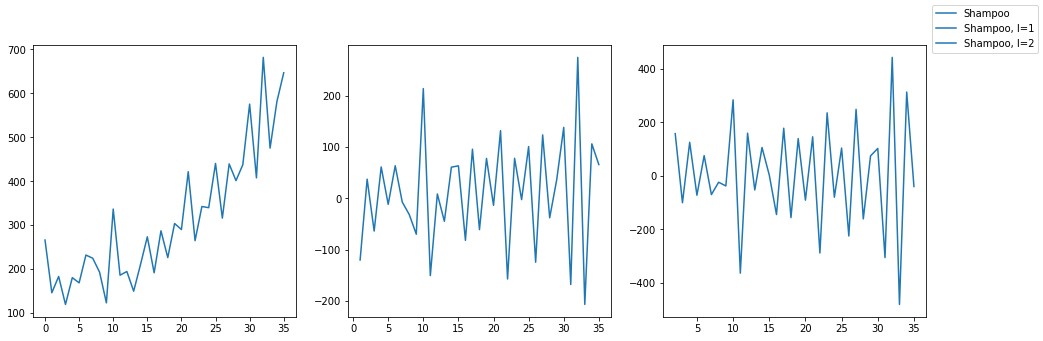

In [134]:
#get differenced values
diff = shampoo.diff()
diff2 = diff.diff()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5))
ax1.plot(shampoo, label='Shampoo')
ax2.plot(diff, label='Shampoo, I=1')
ax3.plot(diff2, label='Shampoo, I=2')
fig.legend()
fig.show()

## ARIMA

Combines AR, Differencing (I), and MA

The differenced value is equal to the present value minus the value at the next lag. A time series which needs to be differenced to be made stationary is said to be an "integrated" time series.

<p style ='text-align:center; font-size: 30px;'>𝑌<sub>t</sub>=𝜙<sub>1</sub>𝑌<sub>𝑡−1</sub>+𝜙<sub>2</sub>𝑌<sub>𝑡−2</sub>...𝜙<sub>𝑝</sub>𝑌<sub>t−𝑝</sub>+𝜖<sub>𝑡</sub>+𝜃<sub>1</sub>𝜖<sub>𝑡−1</sub>+𝜃<sub>2</sub>𝜖<sub>𝑡−2</sub>+...𝜃<sub>𝑞</sub>𝜖<sub>𝑡−𝑞</sub></p>



ARIMA has three main parameters we need to input, p, d, & q

<b>p:</b> The number of AR terms we are going to include<br/>
<b>d:</b> The number of times we are differencing our data<br/>
<b>q:</b> The number MA terms we are going to include

In [197]:
#perform dickey fuller to see if our data is stationary

from statsmodels.tsa.stattools import adfuller
dickeyfuller = adfuller(shampoo)
pd.DataFrame(test[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])


,Sales of shampoo over a three year period
Test Statistic,NaN
p-value,NaN
# Lags Used,NaN
Number of Observations Used,NaN


In [198]:
dickeyfuller_differenced = adfuller(shampoo.diff()[1:])
pd.DataFrame(test_differenced[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])


,0
Test Statistic,-7.249074e+00
p-value,1.799857e-10
#Lags Used,1.000000e+00
Number of Observations Used,3.300000e+01


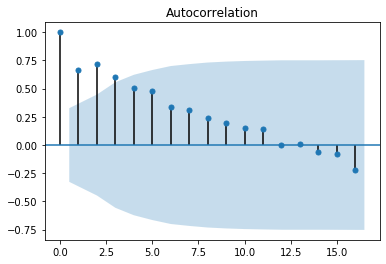

In [149]:
#ACF/PACF to determine which terms in include (MA or AR or Both?)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#plot autocorrelation for each lag (alpha is confidence interval)
plot_acf(shampoo, alpha=.05)
plt.show()

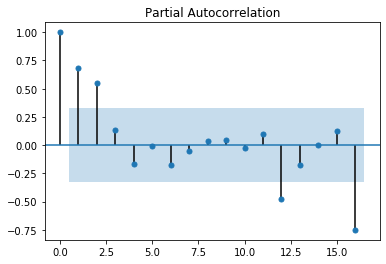

In [152]:
plot_pacf(shampoo, alpha=.05)
plt.show()

## ARIMA

In [204]:
from statsmodels.tsa.arima_model import ARIMA
#fit ARIMA model (2,1,1))

arima1 = ARIMA(train, order=(2,1,1)).fit()
trainpreds = np.append(np.array([0, 0]), np.array(arima1.predict()))
testpreds = arima1.forecast(12)[0]
arima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          ARIMA Model Results                                          
=======================================================================================================
Dep. Variable:     D.Sales of shampoo over a three year period   No. Observations:                   23
Model:                                          ARIMA(2, 1, 1)   Log Likelihood                -127.046
Method:                                                css-mle   S.D. of innovations             56.478
Date:                                         Wed, 13 Jan 2021   AIC                            264.093
Time:                                                 12:52:06   BIC                            269.770
Sample:                                                      1   HQIC                           265.521
                                                                                                       
=====================================================================================================================
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 6.4474      1.720      3.749      0.000       3.077       9.818
ar.L1.D.Sales of shampoo over a three year period    -0.1749      0.232     -0.754      0.451      -0.629       0.280
ar.L2.D.Sales of shampoo over a three year period     0.2136      0.229      0.931      0.352      -0.236       0.663
ma.L1.D.Sales of shampoo over a three year period    -1.0000      0.162     -6.179      0.000      -1.317      -0.683
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7927           +0.0000j            1.7927            0.5000
AR.2            2.6114           +0.0000j            2.6114            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [205]:
trainpreds

array([   0.        ,    0.        ,   94.30286945,   14.94091555,
         86.64152123,    2.9018271 ,   33.74028625,  -33.02478144,
         -1.71128918,   37.02273231,  108.41495715, -142.14815061,
         85.93998375,   44.36616216,   98.8545024 ,   21.82028063,
        -30.78617434,   82.21849981,  -40.67531873,   56.57075587,
        -40.40841519,   -0.2977937 , -145.89929695,   72.52975248])

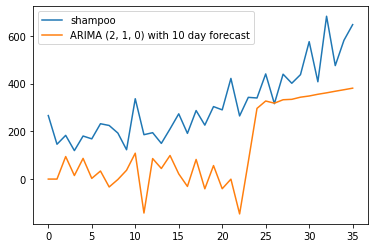

In [206]:
plt.plot(shampoo, label='shampoo')
plt.plot(np.append(trainpreds, testpreds), label='ARIMA (2, 1, 0) with 10 day forecast')
plt.legend()
plt.show()

In [199]:
print('Train RMSE: ', mean_squared_error(train[2:], trainpreds)**0.5)
print('Test RMSE: ', mean_squared_error(test, testpreds)**0.5)

Train RMSE:  235.05549887237663
Test RMSE:  163.89411720956298


## ARIMAX

ARIMA with eXogenous variables - extend ARIMA to include additional variables that might have an impact on what we are are trying to forecast. 

Considerations: 

1) Does our exogenous variable actually impact our endogenous variable (and not the other way around - use granger causality test) 

2) Exogenous variables need to be differenced at the same order as the endogenous 

<img src='resources/seasonal_data.png'/>

### Steps to build an (S)ARIMA(X) Model

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

1. Plot data, see if there are trends <br/>
2. If trends, remove them (differencing, log transform, etc) <br/>
3. If seasonal trends are there determine periodicity. <br/>
4. ACF and PACF of  data <br/>
5. Determine order of differencing, AR, or MA (or both) <br/>
6. Build model and evaluate 


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX(shampoo, exog=None, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))

# Additional Resources

* Modeling cheat sheet: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
* AutoARIMA: https://towardsdatascience.com/time-series-forecasting-using-auto-arima-in-python-bb83e49210cd
* SARIMAX Project walkthrough: https://towardsdatascience.com/newyork-taxi-demand-forecasting-with-sarimax-using-weather-data-d46c041f3f9c